# Анализ текстовых данных и временных рядов

Load data and make some preprocess

In [3]:
import numpy as np
import pandas as pd

In [4]:
FILE_NAME = "2022-05-06_19_17_37.xlsx"

In [22]:
df_report = pd.read_excel(FILE_NAME, sheet_name='Report', header=1)

In [23]:
df_report.head()

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негативных комментариев,Позитивных комментариев,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,0,0,0,0,0,0
1,Вконтакте,-74188185_20318,dev.by,В высадке на Марс бизнесмен видит возможность ...,Нейтральность,2021-12-31 07:41:31,0,2,0,346.0,0,0,0,0,0,0
2,Вконтакте,-74188185_20317,dev.by,Гораздо чаще остальных американские компании и...,Нейтральность,2021-12-31 07:40:42,0,0,0,319.0,0,0,0,0,0,0
3,Вконтакте,-21732035_11926,Информационная безопасность - Anti-Malware.ru,"Twitter-аккаунт, который ранее связывали с защ...",Негатив,2021-12-31 07:23:16,0,2,0,222.0,0,0,0,0,0,0
4,Вконтакте,-718901_3742,EPAM Belarus,Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...,Позитив,2021-12-31 07:13:35,0,37,2,3956.0,0,0,0,0,0,0


In [26]:
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Социальная сеть              13630 non-null  object 
 1   ID поста                     13630 non-null  object 
 2   Владелец                     13630 non-null  object 
 3   Текст                        13630 non-null  object 
 4   Эмоциональный окрас          13630 non-null  object 
 5   Дата                         13630 non-null  object 
 6   Комментариев                 13630 non-null  int64  
 7   Лайков                       13630 non-null  int64  
 8   Репостов                     13630 non-null  int64  
 9   Просмотров                   13593 non-null  float64
 10  Негативных комментариев      13630 non-null  int64  
 11  Позитивных комментариев      13630 non-null  int64  
 12  Нейтральных комментариев     13630 non-null  int64  
 13  Неопределенных к

In [27]:
df_comments = pd.read_excel(FILE_NAME, sheet_name='Comments', header=1)

In [28]:
df_comments.head()

,Социальная сеть,ID поста,ID комментария,Владелец,ID Владелеца,Текст,Эмоциональный окрас,Дата,Лайков,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Вконтакте,-115807015_2334,5412482_2336,Валентин Точилкин,5412482,Задумка понравилась! Думаю будет смотреться лу...,Нейтральность,2021-12-31 08:19:05,1,NaN,NaN,NaN,NaN,NaN,NaN
1,Вконтакте,-30666517_1774956,308730199_1774960,Денис Гончаров,308730199,Вам тоже здоровья и удачи в прошлом и крепкого...,Вежливость,2021-12-31 07:09:40,9,NaN,NaN,NaN,NaN,NaN,NaN
2,Вконтакте,-30666517_1774956,10784303_1774979,Олег Кирин,10784303,Полагаю: Вера и Надежда – это тимлид и прожект...,Юмор,2021-12-31 09:20:39,4,NaN,NaN,NaN,NaN,NaN,NaN
3,Вконтакте,-30666517_1774956,586953361_1775092,Замбек Замбеков,586953361,этот интеллект на али давно существует,Нейтральность,2021-12-31 20:38:00,1,NaN,NaN,NaN,NaN,NaN,NaN
4,Вконтакте,-30666517_1774956,19496621_1775350,Александр Бирабиджанов,19496621,Будет вечный Свет.,Нейтральность,2022-01-03 00:04:52,1,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21498 entries, 0 to 21497
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Социальная сеть      21498 non-null  object 
 1   ID поста             21498 non-null  object 
 2   ID комментария       21498 non-null  object 
 3   Владелец             21498 non-null  object 
 4   ID Владелеца         21498 non-null  int64  
 5   Текст                21497 non-null  object 
 6   Эмоциональный окрас  21498 non-null  object 
 7   Дата                 21498 non-null  object 
 8   Лайков               21498 non-null  int64  
 9   Unnamed: 9           0 non-null      float64
 10  Unnamed: 10          0 non-null      float64
 11  Unnamed: 11          0 non-null      float64
 12  Unnamed: 12          0 non-null      float64
 13  Unnamed: 13          0 non-null      float64
 14  Unnamed: 14          0 non-null      float64
dtypes: float64(6), int64(2), object(7)
m

In [32]:
df_comments.drop(columns=['Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14'],
                 inplace=True)

In [33]:
df_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21498 entries, 0 to 21497
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Социальная сеть      21498 non-null  object
 1   ID поста             21498 non-null  object
 2   ID комментария       21498 non-null  object
 3   Владелец             21498 non-null  object
 4   ID Владелеца         21498 non-null  int64 
 5   Текст                21497 non-null  object
 6   Эмоциональный окрас  21498 non-null  object
 7   Дата                 21498 non-null  object
 8   Лайков               21498 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 1.5+ MB


Data loaded lets make some moves

---
### Test pipeline to re-mark up

In [61]:
df_temp = pd.concat(
    [
        df_comments[df_comments['ID поста'] == '-30666517_1774956']
        , df_comments[df_comments['ID поста'] == '-54530371_346101']
    ]
)

df_temp

,Социальная сеть,ID поста,ID комментария,Владелец,ID Владелеца,Текст,Эмоциональный окрас,Дата,Лайков
1,Вконтакте,-30666517_1774956,308730199_1774960,Денис Гончаров,308730199,Вам тоже здоровья и удачи в прошлом и крепкого...,Вежливость,2021-12-31 07:09:40,9
2,Вконтакте,-30666517_1774956,10784303_1774979,Олег Кирин,10784303,Полагаю: Вера и Надежда – это тимлид и прожект...,Юмор,2021-12-31 09:20:39,4
3,Вконтакте,-30666517_1774956,586953361_1775092,Замбек Замбеков,586953361,этот интеллект на али давно существует,Нейтральность,2021-12-31 20:38:00,1
4,Вконтакте,-30666517_1774956,19496621_1775350,Александр Бирабиджанов,19496621,Будет вечный Свет.,Нейтральность,2022-01-03 00:04:52,1
5,Вконтакте,-54530371_346101,600835500_346102,Юйи Ивнв,600835500,Сальвадор Дали так картины писал👀,Нейтральность,2021-12-30 19:24:41,2
6,Вконтакте,-54530371_346101,196686339_346105,Сергей Семёнов,196686339,(949119 → 4) тут должно быть 1 вместо 4 или я ...,Нейтральность,2021-12-30 19:54:19,1
7,Вконтакте,-54530371_346101,5732229_346108,Алексей Леонов,5732229,Чот ничего не понял. Пояснительная бригада в п...,Нейтральность,2021-12-30 20:41:21,2
8,Вконтакте,-54530371_346101,25013697_346109,Андрей Селезнёв,25013697,Как бы ответ в этой задаче сразу в условии даё...,Юмор,2021-12-30 20:45:09,0
9,Вконтакте,-54530371_346101,196686339_346110,Сергей Семёнов,196686339,"Не, я все-таки решил заморочиться и найти этот...",Негатив,2021-12-30 20:58:34,2
10,Вконтакте,-54530371_346101,568192645_346119,Julius Novachrono,568192645,Что я делаю не так??,Нейтральность,2021-12-30 21:37:17,1


In [62]:
df_test = (
    df_temp
    .groupby(by=['Эмоциональный окрас', 'ID поста'])
    .size()
    .reset_index(name='counts')
)

In [63]:
df_test

,Эмоциональный окрас,ID поста,counts
0,Вежливость,-30666517_1774956,1
1,Негатив,-54530371_346101,3
2,Нейтральность,-30666517_1774956,2
3,Нейтральность,-54530371_346101,9
4,Неопределенность,-54530371_346101,1
5,Юмор,-30666517_1774956,1
6,Юмор,-54530371_346101,2


In [64]:
df_test_report = pd.concat(
    [
        df_report[df_report['ID поста'] == '-30666517_1774956']
        , df_report[df_report['ID поста'] == '-54530371_346101']
    ]
)

df_test_report

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негативных комментариев,Позитивных комментариев,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев
10,Вконтакте,-30666517_1774956,Типичный программист,Кому новогодних пожеланий и ёлочных игрушек от...,Негатив,2021-12-31 06:02:00,4,42,39,38043.0,0,0,2,0,1,1
17,Вконтакте,-54530371_346101,Библиотека программиста,Исследование: Когнитивные нейробиологи из Пари...,Нейтральность,2021-12-30 19:19:17,28,295,323,122352.0,3,0,9,1,0,2


In [67]:
df_test_2 = df_test.copy()
df_test_2

,Эмоциональный окрас,ID поста,counts
0,Вежливость,-30666517_1774956,1
1,Негатив,-54530371_346101,3
2,Нейтральность,-30666517_1774956,2
3,Нейтральность,-54530371_346101,9
4,Неопределенность,-54530371_346101,1
5,Юмор,-30666517_1774956,1
6,Юмор,-54530371_346101,2


In [70]:
for emotion in df_test["Эмоциональный окрас"]:
    df_test_2[emotion] = df_test["counts"][df_test["Эмоциональный окрас"] == emotion]

In [73]:
df_test_2.fillna(0, inplace=True)
df_test_2

,Эмоциональный окрас,ID поста,counts,Вежливость,Негатив,Нейтральность,Неопределенность,Юмор
0,Вежливость,-30666517_1774956,1,1.0,0.0,0.0,0.0,0.0
1,Негатив,-54530371_346101,3,0.0,3.0,0.0,0.0,0.0
2,Нейтральность,-30666517_1774956,2,0.0,0.0,2.0,0.0,0.0
3,Нейтральность,-54530371_346101,9,0.0,0.0,9.0,0.0,0.0
4,Неопределенность,-54530371_346101,1,0.0,0.0,0.0,1.0,0.0
5,Юмор,-30666517_1774956,1,0.0,0.0,0.0,0.0,1.0
6,Юмор,-54530371_346101,2,0.0,0.0,0.0,0.0,2.0


In [75]:
df_test_2.groupby(by=["ID поста"]).sum()

,counts,Вежливость,Негатив,Нейтральность,Неопределенность,Юмор
ID поста,,,,,,
-30666517_1774956,4,1.0,0.0,2.0,0.0,1.0
-54530371_346101,15,0.0,3.0,9.0,1.0,2.0


In [77]:
df_test_3 = df_test_2.groupby(by=["ID поста"]).sum().drop(columns=["counts"])
df_test_3

,Вежливость,Негатив,Нейтральность,Неопределенность,Юмор
ID поста,,,,,
-30666517_1774956,1.0,0.0,2.0,0.0,1.0
-54530371_346101,0.0,3.0,9.0,1.0,2.0


In [81]:
df_test_3[df_test["Эмоциональный окрас"]] = df_test_3[df_test["Эмоциональный окрас"]].astype('int64')

In [82]:
df_test_3

,Вежливость,Негатив,Нейтральность,Неопределенность,Юмор
ID поста,,,,,
-30666517_1774956,1,0,2,0,1
-54530371_346101,0,3,9,1,2


In [84]:
df_test_report.merge(df_test_3, how='inner', on=['ID поста'])

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,...,Позитивных комментариев,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев,Вежливость,Негатив,Нейтральность,Неопределенность,Юмор
0,Вконтакте,-30666517_1774956,Типичный программист,Кому новогодних пожеланий и ёлочных игрушек от...,Негатив,2021-12-31 06:02:00,4,42,39,38043.0,...,0,2,0,1,1,1,0,2,0,1
1,Вконтакте,-54530371_346101,Библиотека программиста,Исследование: Когнитивные нейробиологи из Пари...,Нейтральность,2021-12-30 19:19:17,28,295,323,122352.0,...,0,9,1,0,2,0,3,9,1,2


### Re-markup pipeline

Переразметка кол-ва комментариев по классам в Report, на основании таблицы Comments

In [124]:
%%time

df_comments_grouped = (
    df_comments
    .groupby(by=['Эмоциональный окрас', 'ID поста'])
    .size()
    .reset_index(name='counts')
)

df_copy = df_comments_grouped.copy()
emotions = df_comments_grouped["Эмоциональный окрас"]

for emotion in emotions:
    df_copy[emotion] = df_comments_grouped["counts"][emotions == emotion]

df_copy.fillna(0, inplace=True)
df_comments_transformed = df_copy.groupby(by=["ID поста"]).sum().drop(columns=["counts"])

# df_comments_transformed[emotions] = df_comments_transformed[emotions].astype('int64')

Wall time: 7.54 s


In [125]:
%%time

df_report_new = df_report.copy()

df_report_new = df_report_new.merge(df_comments_transformed, how='left', on=['ID поста'])
df_report_new.fillna(0, inplace=True)

# df_report_new[emotions] = df_report_new[emotions].astype('int64')

Wall time: 26 ms


In [126]:
df_report_new.head()

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,...,Нейтральных комментариев,Неопределенных комментариев,Вежливых комментариев,Юмористических комментариев,Вежливость,Негатив,Нейтральность,Неопределенность,Позитив,Юмор
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,Вконтакте,-74188185_20318,dev.by,В высадке на Марс бизнесмен видит возможность ...,Нейтральность,2021-12-31 07:41:31,0,2,0,346.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,Вконтакте,-74188185_20317,dev.by,Гораздо чаще остальных американские компании и...,Нейтральность,2021-12-31 07:40:42,0,0,0,319.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,Вконтакте,-21732035_11926,Информационная безопасность - Anti-Malware.ru,"Twitter-аккаунт, который ранее связывали с защ...",Негатив,2021-12-31 07:23:16,0,2,0,222.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,Вконтакте,-718901_3742,EPAM Belarus,Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...,Позитив,2021-12-31 07:13:35,0,37,2,3956.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
df_report_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13630 entries, 0 to 13629
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Социальная сеть              13630 non-null  object 
 1   ID поста                     13630 non-null  object 
 2   Владелец                     13630 non-null  object 
 3   Текст                        13630 non-null  object 
 4   Эмоциональный окрас          13630 non-null  object 
 5   Дата                         13630 non-null  object 
 6   Комментариев                 13630 non-null  int64  
 7   Лайков                       13630 non-null  int64  
 8   Репостов                     13630 non-null  int64  
 9   Просмотров                   13630 non-null  float64
 10  Негативных комментариев      13630 non-null  int64  
 11  Позитивных комментариев      13630 non-null  int64  
 12  Нейтральных комментариев     13630 non-null  int64  
 13  Неопределенных к

In [128]:
df_report_new.drop(columns=['Негативных комментариев',
                            'Позитивных комментариев',
                            'Нейтральных комментариев',
                            'Неопределенных комментариев',
                            'Вежливых комментариев',
                            'Юмористических комментариев'
                           ], inplace=True)

In [129]:
df_report_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13630 entries, 0 to 13629
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Социальная сеть      13630 non-null  object 
 1   ID поста             13630 non-null  object 
 2   Владелец             13630 non-null  object 
 3   Текст                13630 non-null  object 
 4   Эмоциональный окрас  13630 non-null  object 
 5   Дата                 13630 non-null  object 
 6   Комментариев         13630 non-null  int64  
 7   Лайков               13630 non-null  int64  
 8   Репостов             13630 non-null  int64  
 9   Просмотров           13630 non-null  float64
 10  Вежливость           13630 non-null  float64
 11  Негатив              13630 non-null  float64
 12  Нейтральность        13630 non-null  float64
 13  Неопределенность     13630 non-null  float64
 14  Позитив              13630 non-null  float64
 15  Юмор                 13630 non-null 

In [130]:
new_columns_order = (
    df_report_new.columns.tolist()[:-6] +
    ['Негатив', 'Позитив', 'Нейтральность', 'Неопределенность', 'Вежливость', 'Юмор']
)

new_columns_order

['Социальная сеть',
 'ID поста',
 'Владелец',
 'Текст',
 'Эмоциональный окрас',
 'Дата',
 'Комментариев',
 'Лайков',
 'Репостов',
 'Просмотров',
 'Негатив',
 'Позитив',
 'Нейтральность',
 'Неопределенность',
 'Вежливость',
 'Юмор']

In [131]:
df_report_new = df_report_new[new_columns_order]
df_report_new.head()

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негатив,Позитив,Нейтральность,Неопределенность,Вежливость,Юмор
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Вконтакте,-74188185_20318,dev.by,В высадке на Марс бизнесмен видит возможность ...,Нейтральность,2021-12-31 07:41:31,0,2,0,346.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Вконтакте,-74188185_20317,dev.by,Гораздо чаще остальных американские компании и...,Нейтральность,2021-12-31 07:40:42,0,0,0,319.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Вконтакте,-21732035_11926,Информационная безопасность - Anti-Malware.ru,"Twitter-аккаунт, который ранее связывали с защ...",Негатив,2021-12-31 07:23:16,0,2,0,222.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Вконтакте,-718901_3742,EPAM Belarus,Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...,Позитив,2021-12-31 07:13:35,0,37,2,3956.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
df_report_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13630 entries, 0 to 13629
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Социальная сеть      13630 non-null  object 
 1   ID поста             13630 non-null  object 
 2   Владелец             13630 non-null  object 
 3   Текст                13630 non-null  object 
 4   Эмоциональный окрас  13630 non-null  object 
 5   Дата                 13630 non-null  object 
 6   Комментариев         13630 non-null  int64  
 7   Лайков               13630 non-null  int64  
 8   Репостов             13630 non-null  int64  
 9   Просмотров           13630 non-null  float64
 10  Негатив              13630 non-null  float64
 11  Позитив              13630 non-null  float64
 12  Нейтральность        13630 non-null  float64
 13  Неопределенность     13630 non-null  float64
 14  Вежливость           13630 non-null  float64
 15  Юмор                 13630 non-null 

In [134]:
df_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Социальная сеть              13630 non-null  object 
 1   ID поста                     13630 non-null  object 
 2   Владелец                     13630 non-null  object 
 3   Текст                        13630 non-null  object 
 4   Эмоциональный окрас          13630 non-null  object 
 5   Дата                         13630 non-null  object 
 6   Комментариев                 13630 non-null  int64  
 7   Лайков                       13630 non-null  int64  
 8   Репостов                     13630 non-null  int64  
 9   Просмотров                   13593 non-null  float64
 10  Негативных комментариев      13630 non-null  int64  
 11  Позитивных комментариев      13630 non-null  int64  
 12  Нейтральных комментариев     13630 non-null  int64  
 13  Неопределенных к

In [206]:
df_report_new.to_csv("Report_remarkup_f64.csv", index=False)

In [207]:
df_report_new = pd.read_csv("Report_remarkup_f64.csv")
df_report_new.head()

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негатив,Позитив,Нейтральность,Неопределенность,Вежливость,Юмор
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Вконтакте,-74188185_20318,dev.by,В высадке на Марс бизнесмен видит возможность ...,Нейтральность,2021-12-31 07:41:31,0,2,0,346.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Вконтакте,-74188185_20317,dev.by,Гораздо чаще остальных американские компании и...,Нейтральность,2021-12-31 07:40:42,0,0,0,319.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Вконтакте,-21732035_11926,Информационная безопасность - Anti-Malware.ru,"Twitter-аккаунт, который ранее связывали с защ...",Негатив,2021-12-31 07:23:16,0,2,0,222.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Вконтакте,-718901_3742,EPAM Belarus,Дорогие коллеги и друзья! \n⠀ \nСпасибо за ваш...,Позитив,2021-12-31 07:13:35,0,37,2,3956.0,0.0,0.0,0.0,0.0,0.0,0.0


### 1. Определить 3 поста с самой сильной и 3 поста с самой слабой мерой связи окраса поста с окрасом его комментариев. Обосновать методику расчета силы связи.

In [173]:
def get_post_vector(row):
    emotion = row.iat[0, 4]
    emotions = row.columns.tolist()[-6:]
    vector = np.zeros((len(emotions)))
    
    for i in range(len(emotions)):
        if emotion == emotions[i]:
            vector[i] = 1
            return vector

In [212]:
def get_comments_vector(row):
    emotions = row.columns.tolist()[-6:]
    vector = np.array(row[emotions])
    vec_sum = np.sum(vector)
    if np.abs(vec_sum) > 0:
        vector /= vec_sum
    
    return vector

In [210]:
from sklearn.metrics.pairwise import cosine_similarity

In [240]:
%%time

cosine_dict = {"cosine_simillarity" : []}

post_ids = df_report_new['ID поста']
for post_id in post_ids:
    row = df_report_new[df_report_new['ID поста'] == post_id]
    post_emotion_vector = get_post_vector(row).reshape(1,-1)
    comments_emotion_vector = get_comments_vector(row).reshape(1,-1)
    
    metric = cosine_similarity(
        post_emotion_vector,
        comments_emotion_vector)[0,0]
    
    metric = np.nan_to_num(metric, nan=0)
    
    cosine_dict["cosine_simillarity"].append(metric)

Wall time: 33.3 s


In [241]:
df_report_metrics = df_report_new.copy()

In [242]:
df_report_metrics["cosine"] = pd.DataFrame(cosine_dict)

In [243]:
df_report_metrics.sort_values(by=["cosine"], ascending=False).head(3)

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негатив,Позитив,Нейтральность,Неопределенность,Вежливость,Юмор,cosine
6262,Вконтакте,-32007202_23325,IT.FUT.RU - всё про карьеру в IT,#мемы@findit_msk,Нейтральность,2021-11-08 18:00:00,1,16,3,1402.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
9490,Вконтакте,-30767675_26484,Фонд «Сколково»,Пятничный #дайджест новостей \n \n1. Грант на ...,Позитив,2021-10-08 11:30:28,8,10,3,1960.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
6604,Вконтакте,-29617250_2699,DevGAMM,📊 Представляем трек по аналитике на DevGAMM Fa...,Позитив,2021-11-04 08:44:27,2,14,3,1245.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [244]:
df_report_metrics.sort_values(by=["cosine"], ascending=True).head(3)

,Социальная сеть,ID поста,Владелец,Текст,Эмоциональный окрас,Дата,Комментариев,Лайков,Репостов,Просмотров,Негатив,Позитив,Нейтральность,Неопределенность,Вежливость,Юмор,cosine
0,Вконтакте,-159668210_25795,FSOCIETY | IT - сообщество,Нам задают много вопросов о технологическом ко...,Нейтральность,2021-12-31 07:45:00,0,0,0,3548.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8824,Вконтакте,-116304541_1041,WN Events,Encased — хардкорная CRPG с премиальной монети...,Позитив,2021-10-14 12:38:55,0,1,0,754.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8826,Вконтакте,-73748648_6148,iot.ru Новости Интернета вещей,📉Минпромторг провел презентацию по разработке ...,Нейтральность,2021-10-14 12:17:18,0,0,1,155.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Определить топ 10 биграмм в постах и топ 10 биграмм в комментариях.

In [251]:
text_report = df_report["Текст"].values.tolist()
text_comment = df_comments["Текст"].values.tolist()

In [253]:
text_report[0], text_comment[0]

('Нам задают много вопросов о технологическом конкурсе НТИ Up Great по Аэрологистике. Отвечаем на популярные:\n\nКак были определены параметры технологического барьера — масса груза, дистанция и сценарий перевозки?\n\nБарьер сформирован потребностями рынка. Мы усреднили все существующие и ожидаемые значения и получили: 50 кг груза и дистанцию в 1000 км.\n\nКакие технологии и решения отсутствуют и будут разработаны в конкурсе?\n\nСуществует сразу несколько проблем:\n\n— Низкая надежность беспилотного воздушного судна. Пока в мире никто не показал фактическую перевозку хотя бы 50 кг на 1000 км между несколькими получателями.\n\n— Низкая автономность обслуживания. Держать специализированный персонал в каждой точке погрузки-разгрузки экономически невыгодно.\n\nКак обеспечивается объективность?\n\nПубличностью — контроль груза, видеозапись действий персонала, фиксация траектории полета и т.д. На испытаниях могут присутствовать все желающие эксперты от разных организаций.\n\nПодробнее:\xa0ht

In [260]:
import nltk
# nltk.download('punkt')

In [248]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from tqdm import tqdm

import pymorphy2

In [281]:
def clean_texts(data):
    data = [re.sub('\s+', ' ', str(post)) for post in data]
    data = [re.sub("\d+", ' ', post) for post in data]

    data = [re.sub("http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+", ' ', post) 
            for post in data]
    
    data = [re.sub(r'[^\w\s]','', post) for post in data]
    
    morph = pymorphy2.MorphAnalyzer()
    data_norm = []
    for i in tqdm(range(len(data))):
        data_norm.append(
            list(
                morph.parse(token)[0].normal_form for token in word_tokenize(
                    data[i].lower().strip(), language="russian")
            )
        )
        
    bigram_norm = []
    for sentence in tqdm(data_norm):
        data_norm_stop = []
        for word in sentence:
            if word in stopwords.words("russian"):
                continue
            else:
                data_norm_stop.append(word)
        bigram_norm += list(nltk.bigrams(data_norm_stop))
        
    return bigram_norm

In [268]:
processed_text_report = clean_texts(text_report)

100%|████████████████████████████████████████████████████████████████████████████| 13630/13630 [05:03<00:00, 44.86it/s]


In [269]:
bigram_fd = nltk.FreqDist(processed_text_report)

bigram_fd.most_common(10)

[(('принять', 'участие'), 361),
 (('искусственный', 'интеллект'), 328),
 (('это', 'год'), 315),
 (('технополис', 'москва'), 309),
 (('база', 'данные'), 285),
 (('информационный', 'безопасность'), 261),
 (('оэз', 'технополис'), 258),
 (('язык', 'программирование'), 243),
 (('подать', 'заявка'), 228),
 (('машинный', 'обучение'), 218)]

In [282]:
processed_text_comment = clean_texts(text_comment)

100%|███████████████████████████████████████████████████████████████████████████| 21498/21498 [01:18<00:00, 273.91it/s]


In [283]:
bigram_fd2 = nltk.FreqDist(processed_text_comment)

bigram_fd2.most_common(10)

[(('бесплатный', 'обслуживание'), 594),
 (('обслуживание', 'навсегда'), 352),
 (('карта', 'тинькофф'), 266),
 (('дебетовый', 'карта'), 243),
 (('тинькофф', 'блэк'), 242),
 (('кредитный', 'карта'), 212),
 (('карта', 'tinkoff'), 179),
 (('ссылка', 'получить'), 172),
 (('подписка', 'тинькофф'), 161),
 (('получить', 'бонус'), 159)]

### 3. Построить прогноз суммарного количества просмотров постов по дням на 1 месяц вперед. Оценить качество прогнозной модели.

In [288]:
df_reports_ts = df_report.copy()

In [289]:
df_reports_ts.columns.tolist()

['Социальная сеть',
 'ID поста',
 'Владелец',
 'Текст',
 'Эмоциональный окрас',
 'Дата',
 'Комментариев',
 'Лайков',
 'Репостов',
 'Просмотров',
 'Негативных комментариев',
 'Позитивных комментариев',
 'Нейтральных комментариев',
 'Неопределенных комментариев',
 'Вежливых комментариев',
 'Юмористических комментариев']

In [291]:
df_reports_ts.drop(
    columns=['Социальная сеть',
             'ID поста',
             'Владелец',
             'Текст',
             'Эмоциональный окрас',
             'Комментариев',
             'Лайков',
             'Репостов',
             'Негативных комментариев',
             'Позитивных комментариев',
             'Нейтральных комментариев',
             'Неопределенных комментариев',
             'Вежливых комментариев',
             'Юмористических комментариев']
, inplace=True)

In [292]:
df_reports_ts.head()

,Дата,Просмотров
0,2021-12-31 07:45:00,3548.0
1,2021-12-31 07:41:31,346.0
2,2021-12-31 07:40:42,319.0
3,2021-12-31 07:23:16,222.0
4,2021-12-31 07:13:35,3956.0


In [295]:
df_reports_ts['Дата'] = df_reports_ts['Дата'].str.replace(r'\s.+', '')
df_reports_ts.head()

,Дата,Просмотров
0,2021-12-31,3548.0
1,2021-12-31,346.0
2,2021-12-31,319.0
3,2021-12-31,222.0
4,2021-12-31,3956.0


In [305]:
df_ts = df_reports_ts.groupby(by=['Дата']).sum()
df_ts.index = df_ts.index.str.replace(r'-', '')
df_ts

,Просмотров
Дата,
20210901,1542779.0
20210902,820271.0
20210903,1958340.0
20210904,133318.0
20210905,194381.0
...,...
20211227,716678.0
20211228,780446.0
20211229,816734.0


In [306]:
df_ts.index

Index(['20210901', '20210902', '20210903', '20210904', '20210905', '20210906',
       '20210907', '20210908', '20210909', '20210910',
       ...
       '20211222', '20211223', '20211224', '20211225', '20211226', '20211227',
       '20211228', '20211229', '20211230', '20211231'],
      dtype='object', name='Дата', length=122)

In [307]:
proccesed = [ int(date[-4:-2]) - int(df_ts.index[i-1][-4:-2]) == 1 if i != 0 else True for i, date in enumerate(df_ts.index)]

In [333]:
proccesed[-1] = True
df_ts.index[proccesed]
days_by_month_2021 = df_ts.index[proccesed]

In [311]:
import matplotlib.pyplot as plt

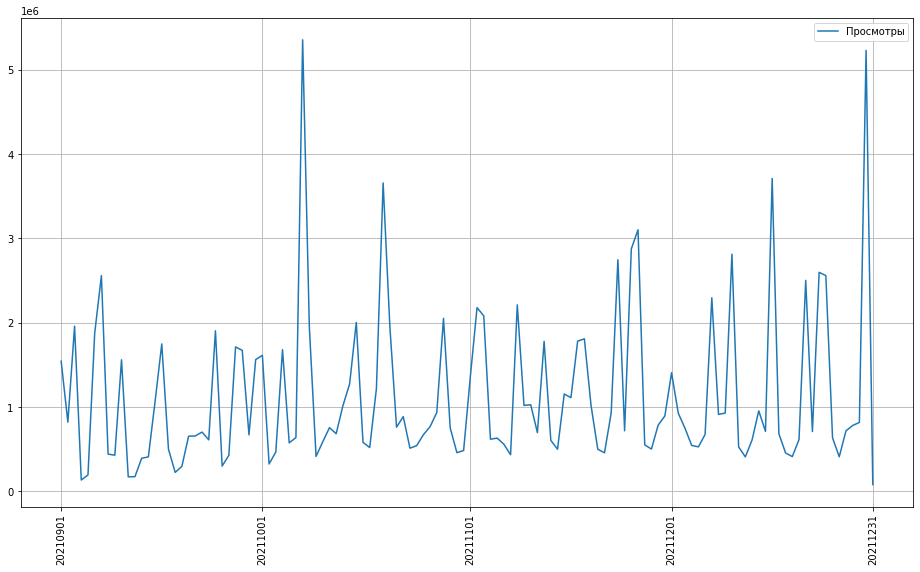

In [497]:
plt.figure(figsize=(16,9))

plt.plot(df_ts.index, df_ts.iloc[:,0], label='Просмотры')

plt.legend(loc=0)
plt.grid()
plt.xticks(days_by_month_2021, rotation=90)
plt.show()

Проверим ряд на стационнарность и при необходимости приведём его к стационарному виду.

In [338]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [339]:
def adf_test(values):
    result = adfuller(values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

In [344]:
adf_test(df_ts)

ADF Statistic: -1.974442
p-value: 0.297890
Critical Values:
	1%: -3.492
	5%: -2.889
	10%: -2.581


$p-value > 0.05 => $ анализируемый временной ряд не стационарен

In [370]:
def differencing(series):
    return (series - series.shift(1)).dropna()

In [430]:
def logorifm(series):
    return np.log(series)

In [498]:
df_ts_log = logorifm(df_ts.copy())
adf_test(df_ts_log)

ADF Statistic: -2.474046
p-value: 0.121918
Critical Values:
	1%: -3.492
	5%: -2.889
	10%: -2.581


In [499]:
df_ts_d1 = differencing(df_ts_log.copy())

In [500]:
adf_test(df_ts_d1)

ADF Statistic: -6.396853
p-value: 0.000000
Critical Values:
	1%: -3.492
	5%: -2.889
	10%: -2.581


Автокорреляции и частичные автокорреляции

In [378]:
import warnings
warnings.filterwarnings("ignore")

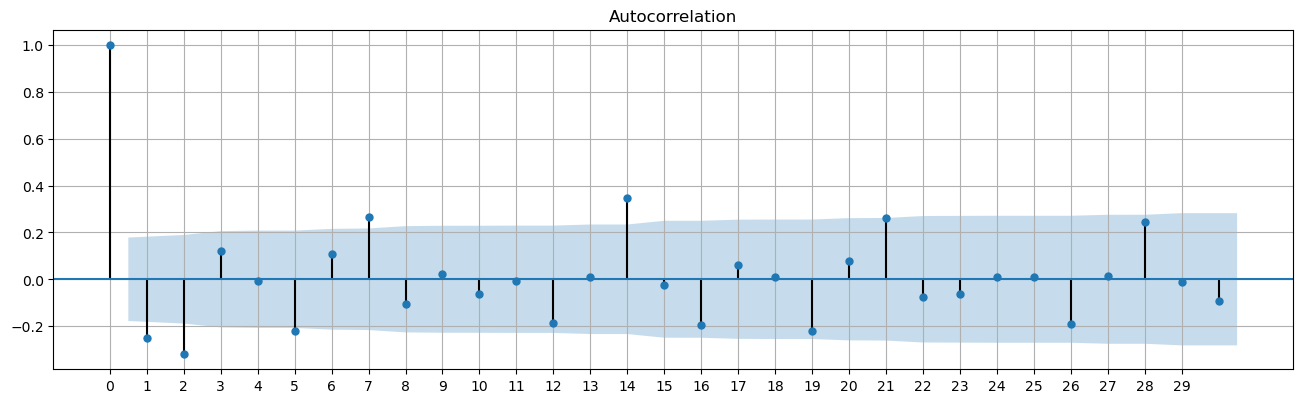

In [501]:
fig, axes = plt.subplots(1,1,figsize=(16,4.5), dpi= 100)

lags = 30

plot_acf(df_ts_d1.iloc[:,0].tolist(), lags=lags, ax=axes)

plt.xticks(np.arange(lags))
plt.grid()
plt.show()

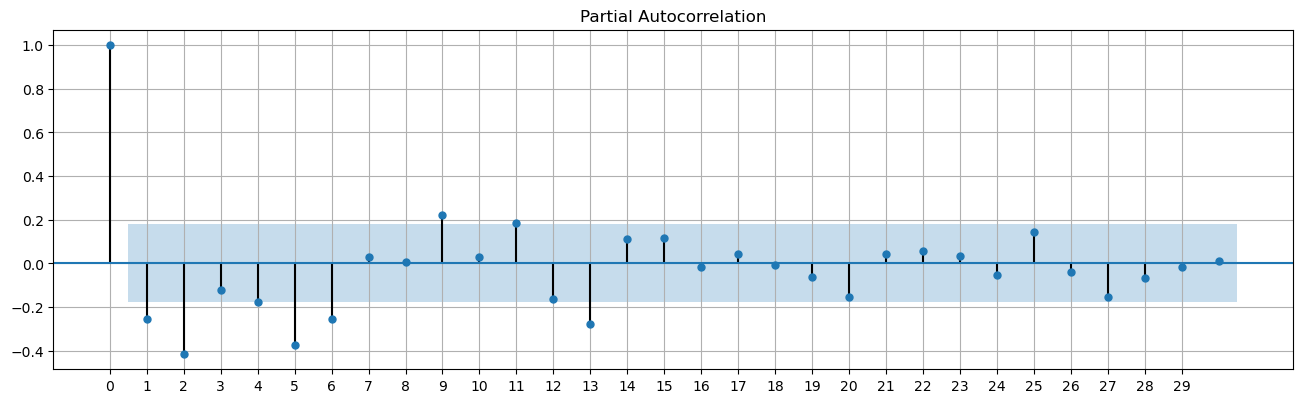

In [502]:
fig, axes = plt.subplots(1,1,figsize=(16,4.5), dpi= 100)

lags = 30

plot_pacf(df_ts_d1.iloc[:,0].tolist(), lags=lags, ax=axes)

plt.xticks(np.arange(lags))
plt.grid()
plt.show()

$p=5, d=1, q=7$

Построение модели ARIMA

In [397]:
train_idxs = [int(date[-4:-2]) != 12 for date in df_ts.index]
test_idxs  = [int(date[-4:-2]) == 12 for date in df_ts.index]

In [398]:
from statsmodels.tsa.arima.model import ARIMA

In [484]:
p, d, q = 5, 1, 7
model = ARIMA(df_ts_log[train_idxs], order=(p, d, q))

In [485]:
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:             Просмотров   No. Observations:                   91
Model:                 ARIMA(5, 1, 7)   Log Likelihood                 -77.836
Date:                Fri, 24 Mar 2023   AIC                            181.671
Time:                        03:27:14   BIC                            214.169
Sample:                    09-01-2021   HQIC                           194.776
                         - 11-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0667      0.136     -0.491      0.623      -0.333       0.199
ar.L2         -0.6146      0.110     -5.611      0.000      -0.829      -0.400
ar.L3         -0.4306      0.171     -2.516      0.0

In [486]:
days_to_forecast = df_ts.index[test_idxs].shape[0]

In [487]:
pred_test = fitted_model.forecast(steps=days_to_forecast)

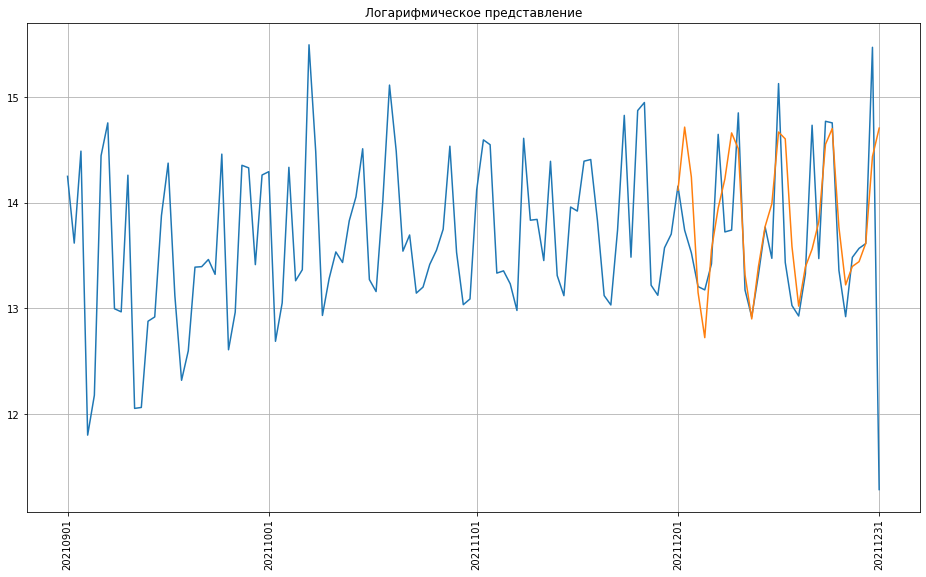

In [488]:
plt.figure(figsize=(16,9))

plt.plot(df_ts.index, df_ts_log)
plt.plot(df_ts.index[test_idxs], pred_test)

plt.title("Логарифмическое представление")
plt.grid()
plt.xticks(days_by_month_2021, rotation=90)
plt.show()

In [489]:
def mape(actual, pred):
    return np.mean( np.abs(actual - pred) / actual ) * 100

In [490]:
mape(df_ts_log[test_idxs].iloc[:,0], pred_test)

3.68317587561788

Делаем предсказание на январь и обучаемся на всём

In [503]:
model = ARIMA(df_ts_log, order=(p, d, q))

In [504]:
fitted_model = model.fit()
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:             Просмотров   No. Observations:                  122
Model:                 ARIMA(5, 1, 7)   Log Likelihood                -111.929
Date:                Fri, 24 Mar 2023   AIC                            249.858
Time:                        17:26:36   BIC                            286.203
Sample:                    09-01-2021   HQIC                           264.619
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7104      0.120     -5.936      0.000      -0.945      -0.476
ar.L2         -0.3962      0.050     -7.959      0.000      -0.494      -0.299
ar.L3         -0.4029      0.058     -7.003      0.0

In [505]:
january_dates = [f'202201{day:02}' for day in range(1,32)]

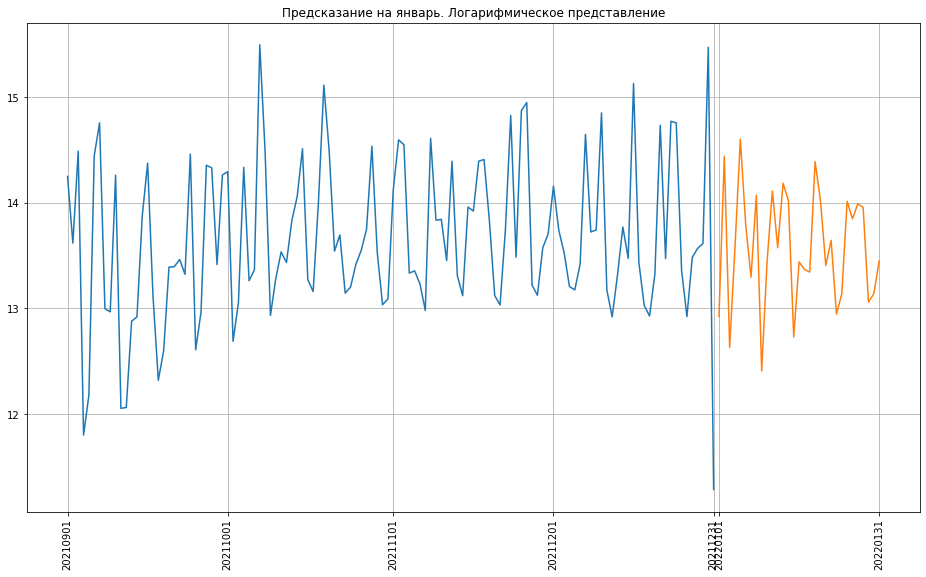

In [507]:
pred_test = fitted_model.forecast(steps=days_to_forecast)
plt.figure(figsize=(16,9))

plt.plot(df_ts.index, df_ts_log)
plt.plot(january_dates, pred_test)

plt.title("Предсказание на январь. Логарифмическое представление")
plt.grid()
plt.xticks(days_by_month_2021.tolist() + [january_dates[0], january_dates[-1]], rotation=90)
plt.show()

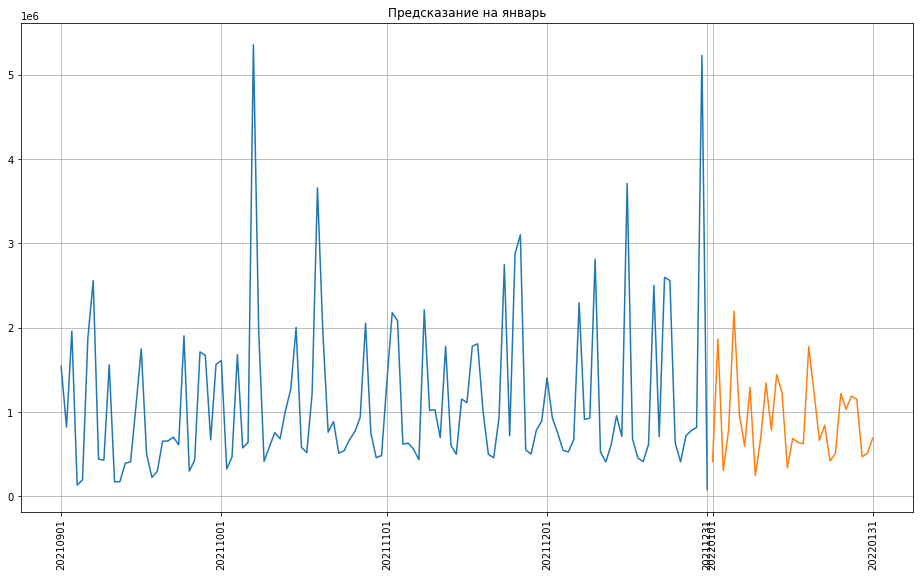

In [495]:
pred_test = fitted_model.forecast(steps=days_to_forecast)
plt.figure(figsize=(16,9))

plt.plot(df_ts.index, df_ts)
plt.plot(january_dates, np.exp(pred_test))

plt.title("Предсказание на январь")
plt.grid()
plt.xticks(days_by_month_2021.tolist() + [january_dates[0], january_dates[-1]], rotation=90)
plt.show()